In [1]:
from scripts.shared_utilities import *

2024-06-04 17:13:27.268487: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 17:13:27.272742: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 17:13:27.320584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 17:13:28.199071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = KerasLSTMModel(path=Path("../models/modello-passi-sonno-LSTM.keras"),load=True)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 20)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 48, 20)         │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           961 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,801 (26.57 KB)

 Trainable params: 6,801 (26.57 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
DEFAULT_CHUNK_SIZE*=2

data = DateStepSleepData(dataset_chunk=DEFAULT_CHUNK_SIZE,sleep_score="mn_sleep_score_all")
data.get_dataset().head()

uuid        date    steps  sleep_score  \
0  1003e58667235e01b49008155604980b3900b00e  2016-07-31  3049.04          NaN   
1  1003e58667235e01b49008155604980b3900b00e  2016-08-01  4309.81     0.547576   
2  1003e58667235e01b49008155604980b3900b00e  2016-08-02   255.11          NaN   
3  1003e58667235e01b49008155604980b3900b00e  2016-08-03  5118.07          NaN   
4  1003e58667235e01b49008155604980b3900b00e  2016-08-04  2228.88     0.415384   

     n_date  n_steps_all  n_sleep_score_all   m_steps  dm_steps  mn_steps_all  \
0  0.332418    -0.866270                NaN  3243.864       NaN     -0.825126   
1  0.335165    -0.600012          -0.367737  3673.029   429.165     -0.734492   
2  0.337912    -1.456310                NaN  4083.098   410.069     -0.647891   
3  0.340659    -0.429319                NaN  4295.129   212.031     -0.603113   
4  0.343407    -1.039477          -1.259176  4306.411    11.282     -0.600730   

   dmn_steps_all  m_sleep_score  dm_sleep_score  mn_sleep_score_all  \
0            NaN            NaN             NaN                 NaN   
1       0.090634            NaN             NaN                 NaN   
2       0.086601            NaN             NaN                 NaN   
3       0.044778            NaN             NaN                 NaN   
4       0.002383            NaN             NaN                 NaN   

   dmn_sleep_score_all  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [9]:
utils = Utilities(model, data)

In [10]:
utils.train_model()

Epoch 1/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2125 - r2_score: 0.3391 - val_loss: 0.5294 - val_r2_score: -0.3326
Epoch 2/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1560 - r2_score: 0.5247 - val_loss: 0.5575 - val_r2_score: -0.4033
Epoch 3/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1291 - r2_score: 0.6090 - val_loss: 0.5454 - val_r2_score: -0.3729
Epoch 4/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1144 - r2_score: 0.6450 - val_loss: 0.6030 - val_r2_score: -0.5180
Epoch 5/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1063 - r2_score: 0.6749 - val_loss: 0.5569 - val_r2_score: -0.4019
Epoch 6/20
1952/1952 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0996 - r2_score: 0.6931 - val_loss: 0.5389 - val_r2_score: -0.3567


In [11]:
utils.evaluate_model()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3461 - r2_score: -0.0011    


[0.41673165559768677, -0.07213711738586426]

In [7]:
model.save()

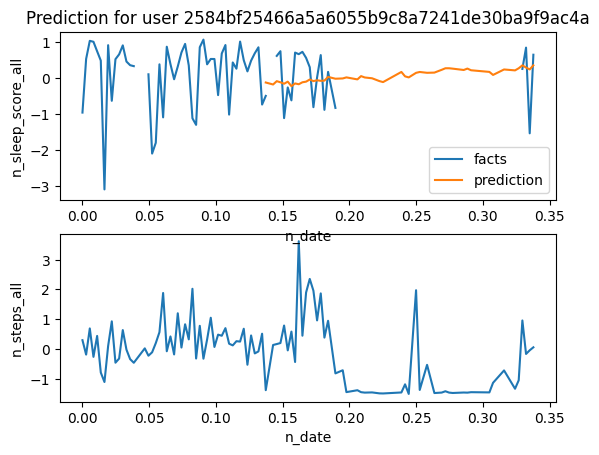

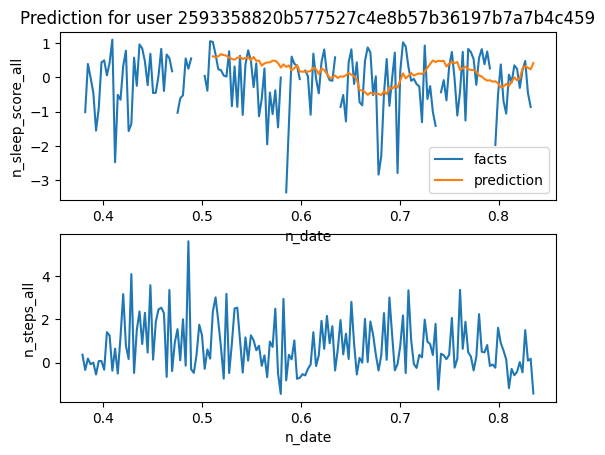

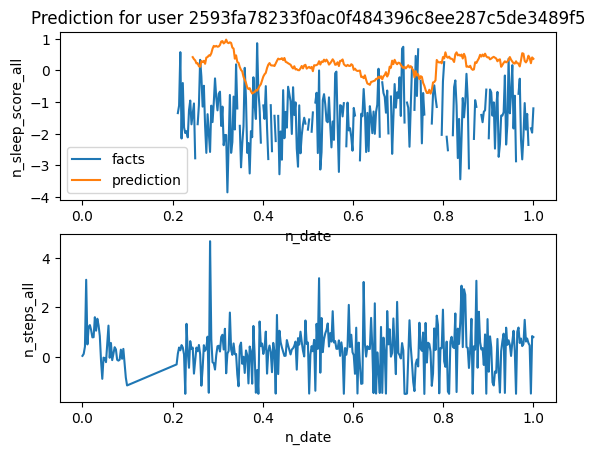

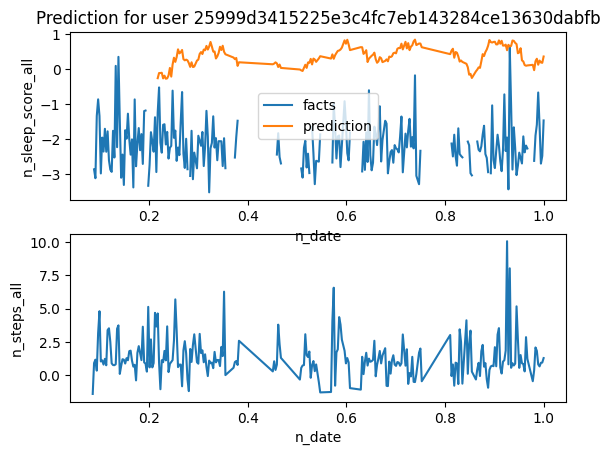

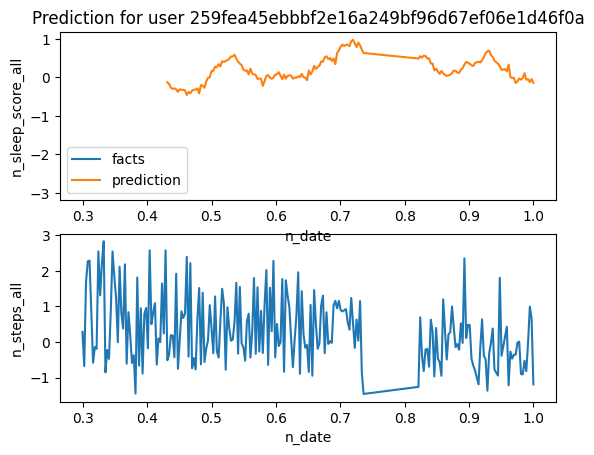

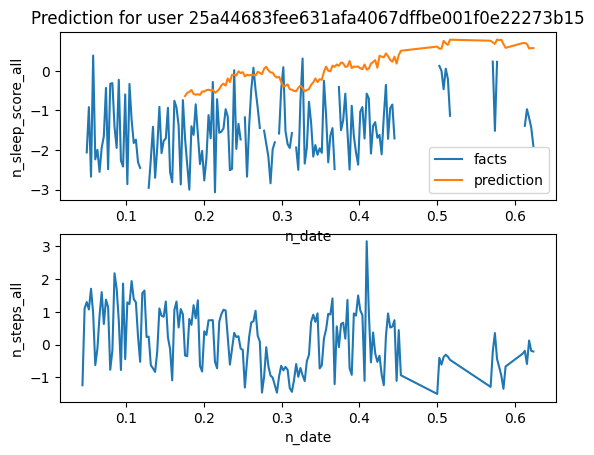

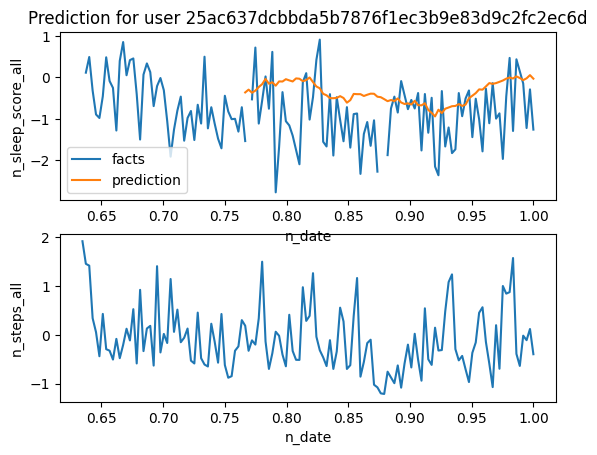

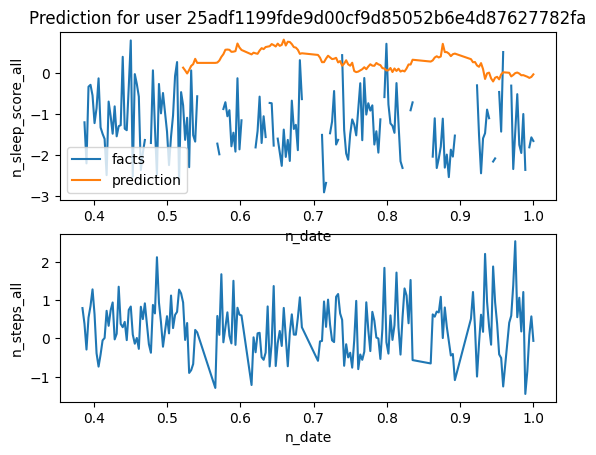

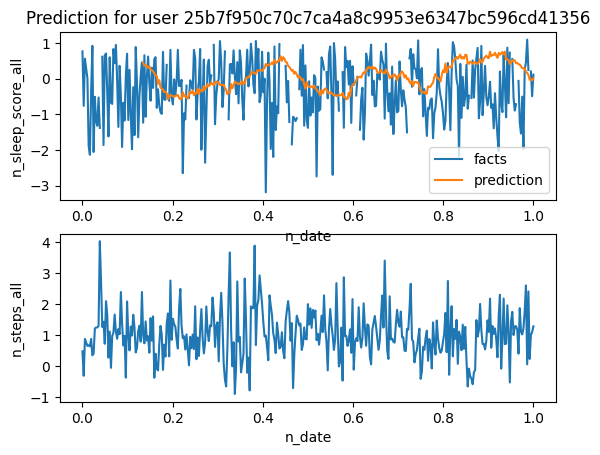

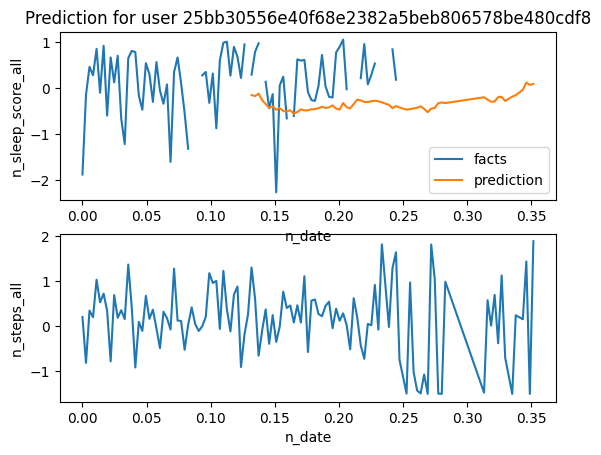

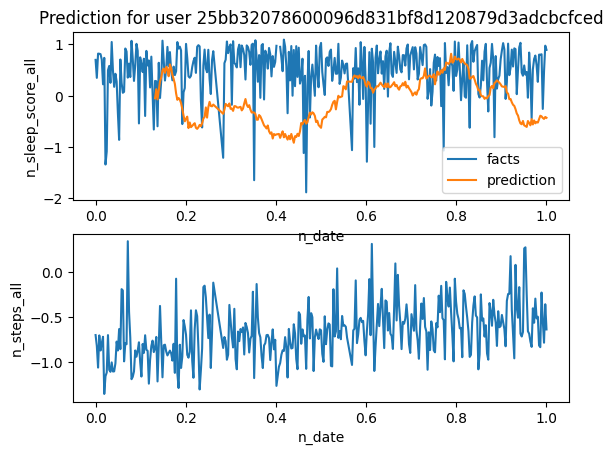

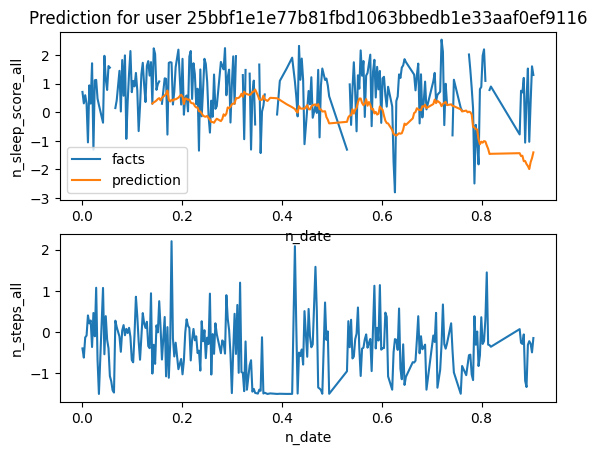

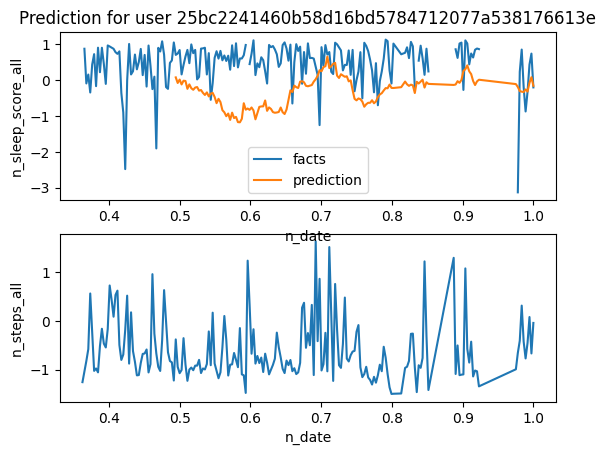

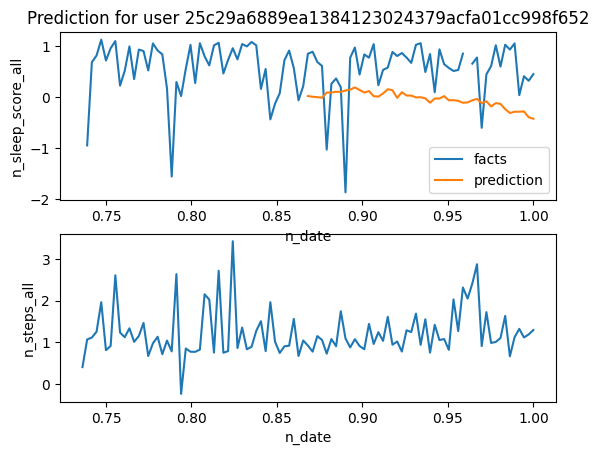

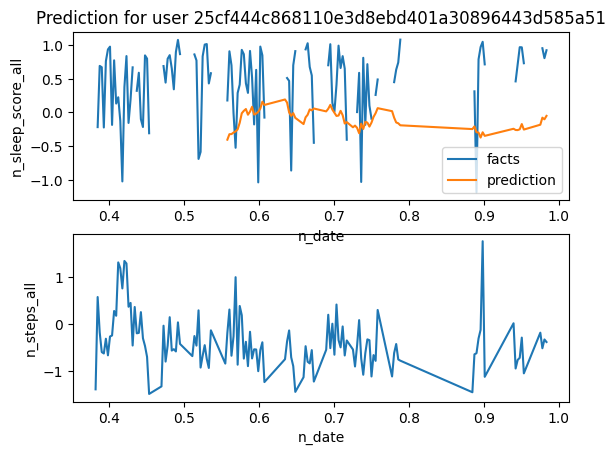

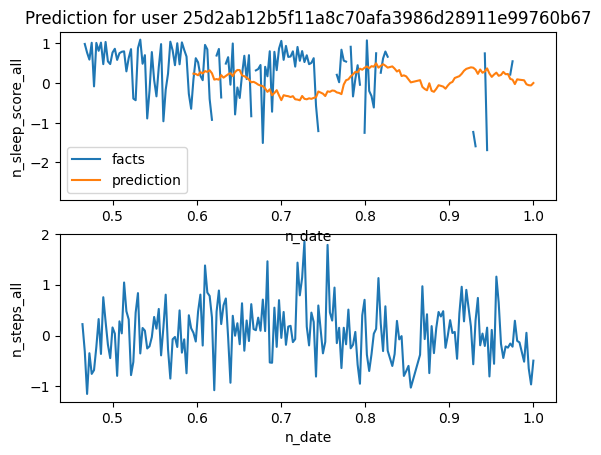

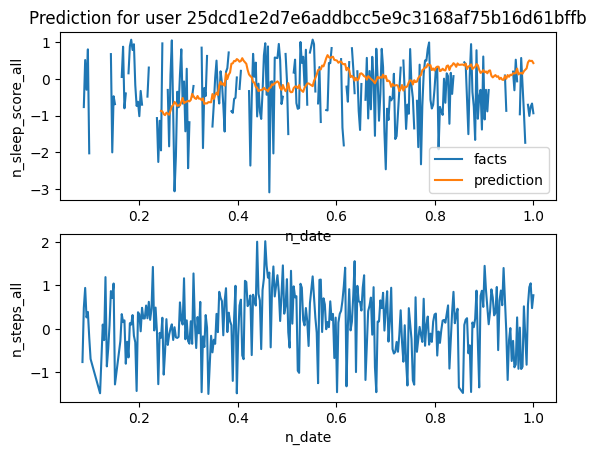

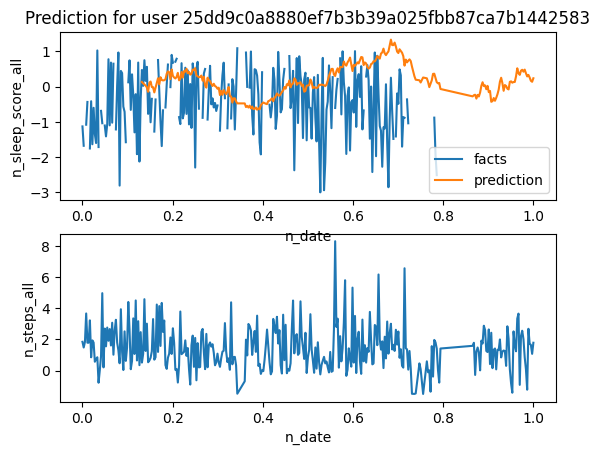

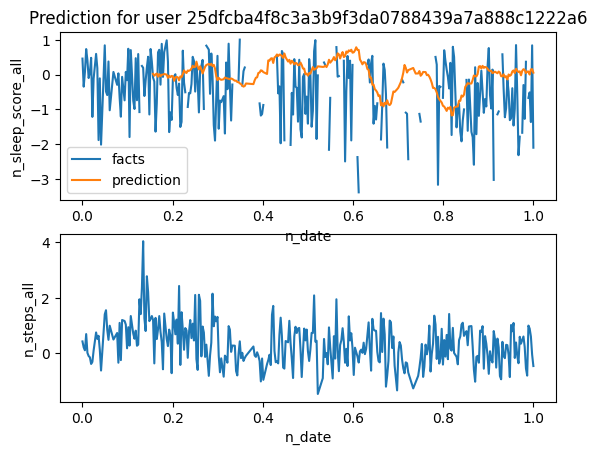

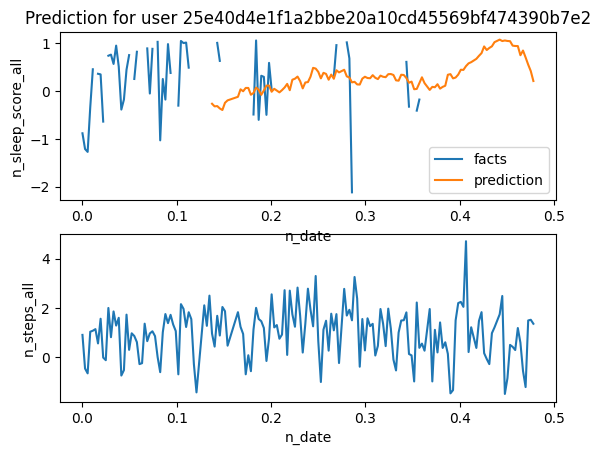

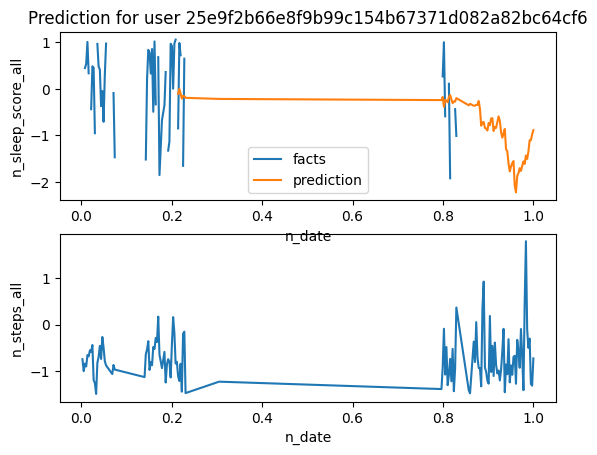

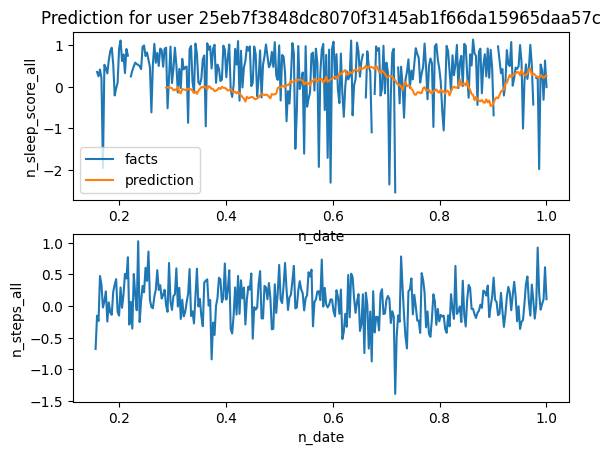

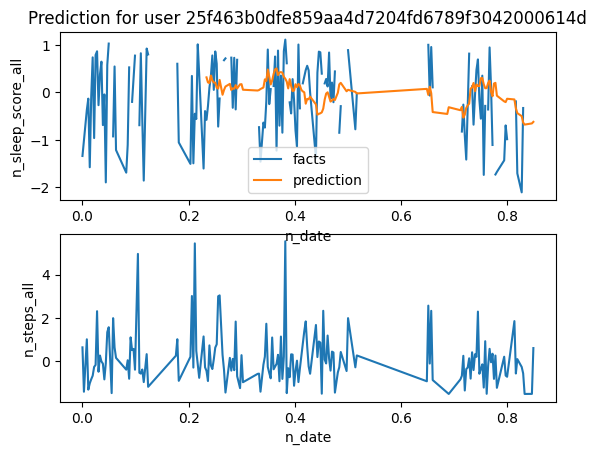

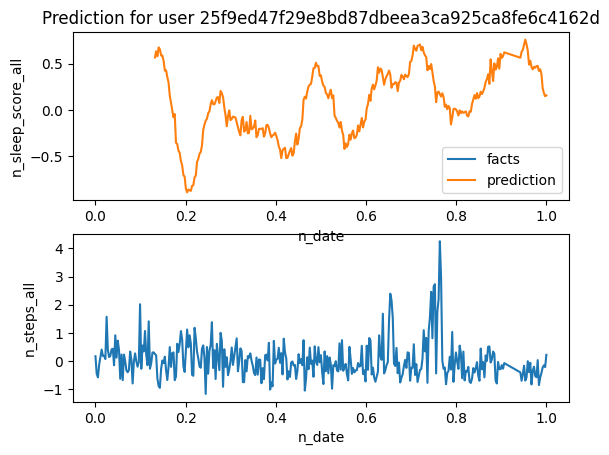

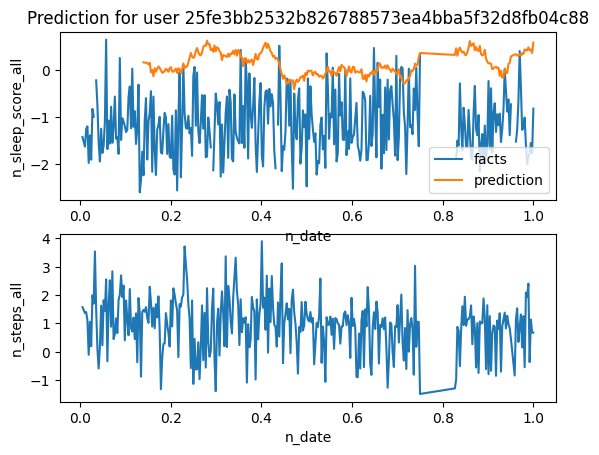

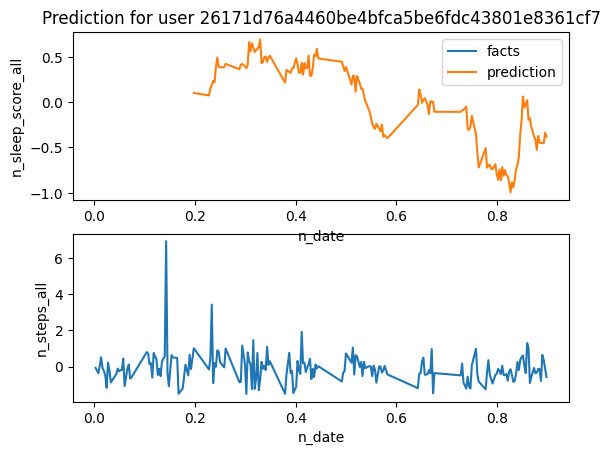

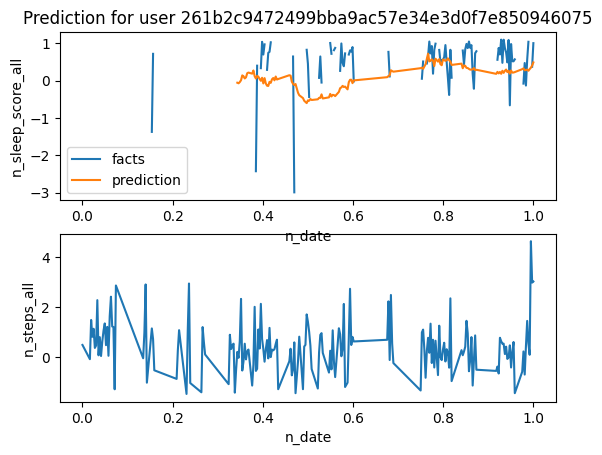

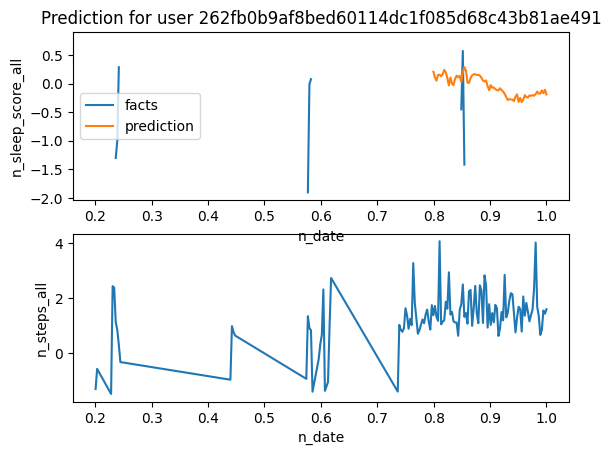

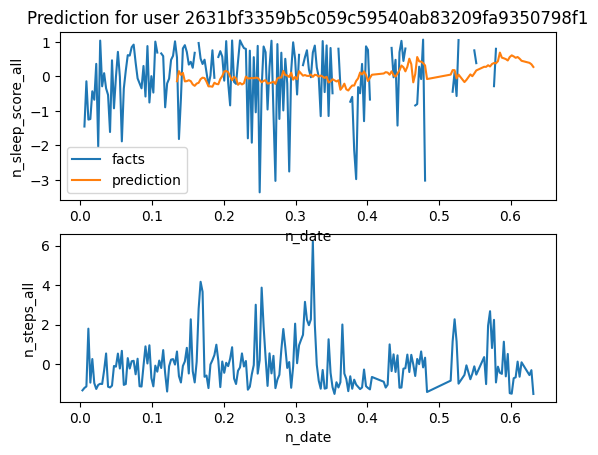

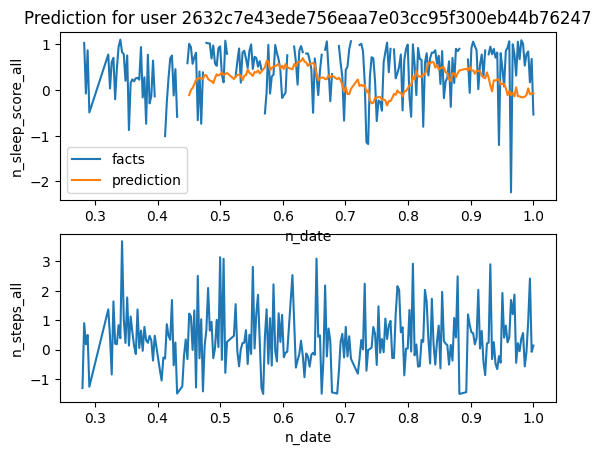

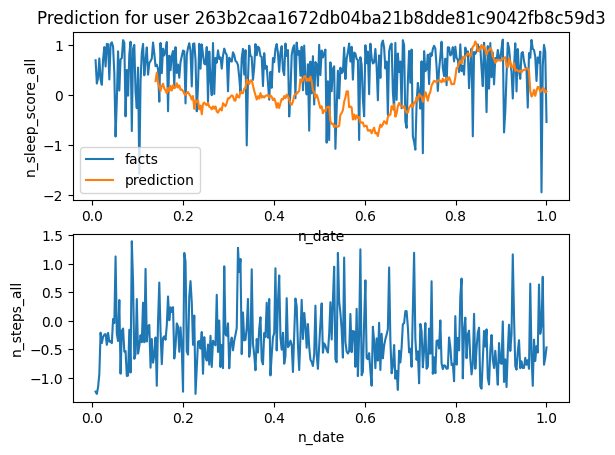

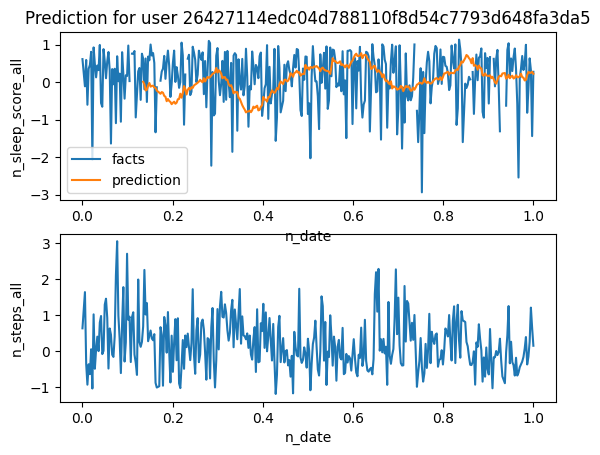

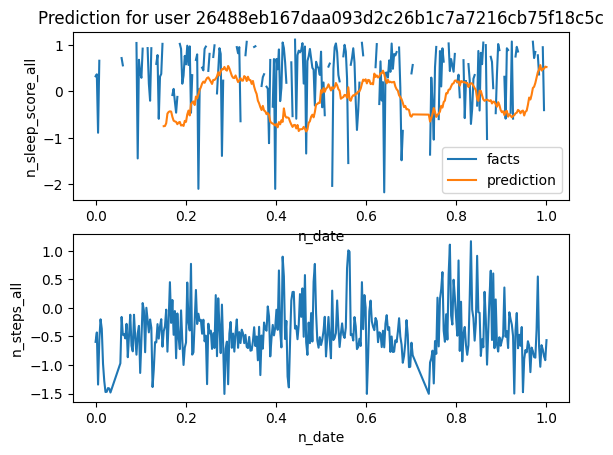

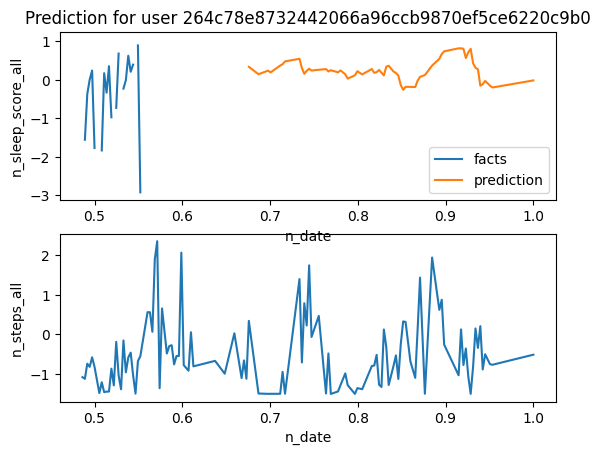

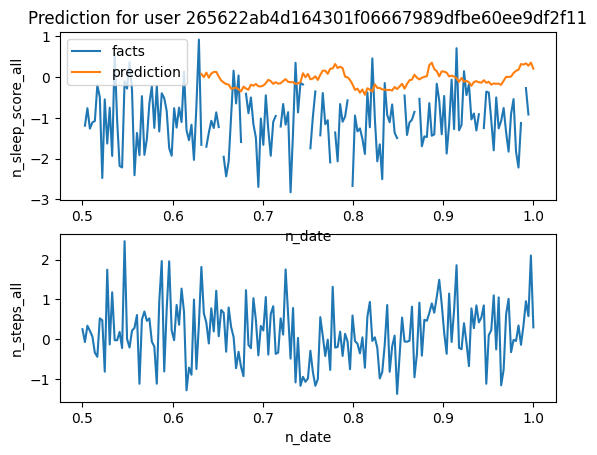

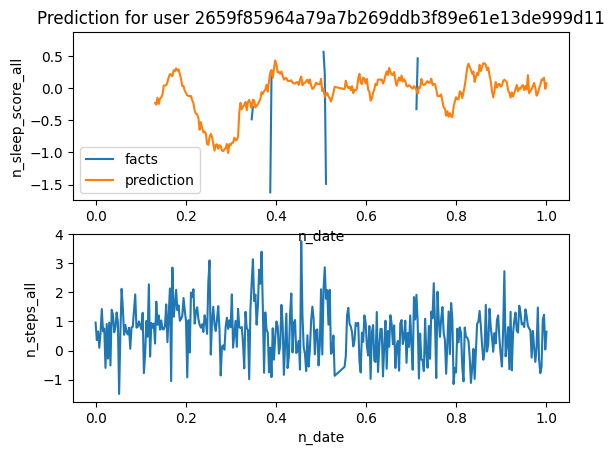

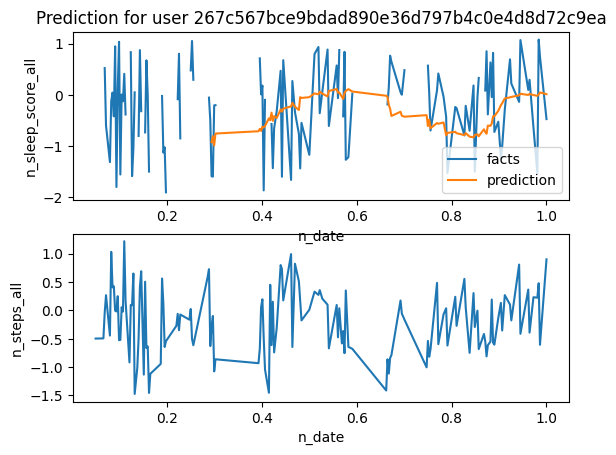

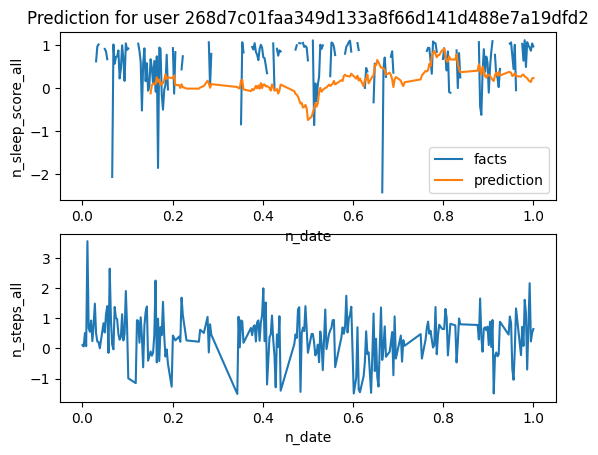

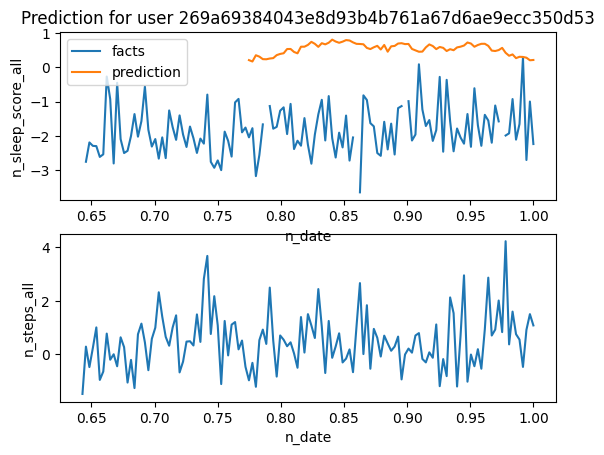

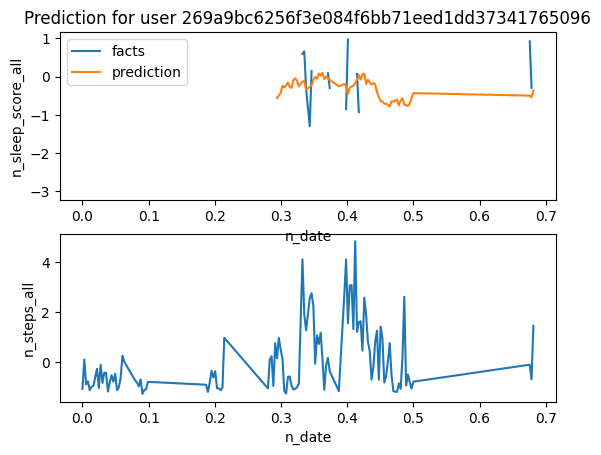

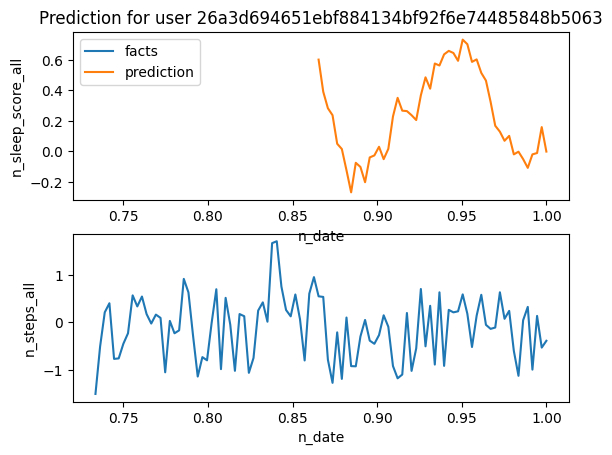

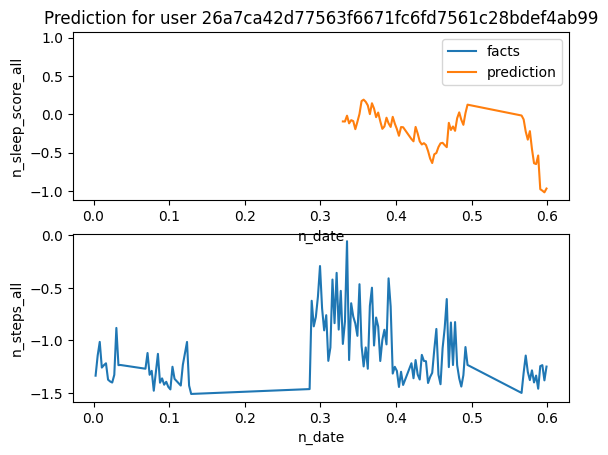

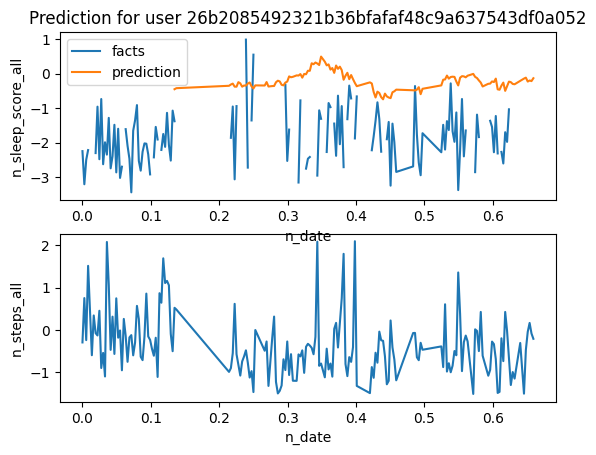

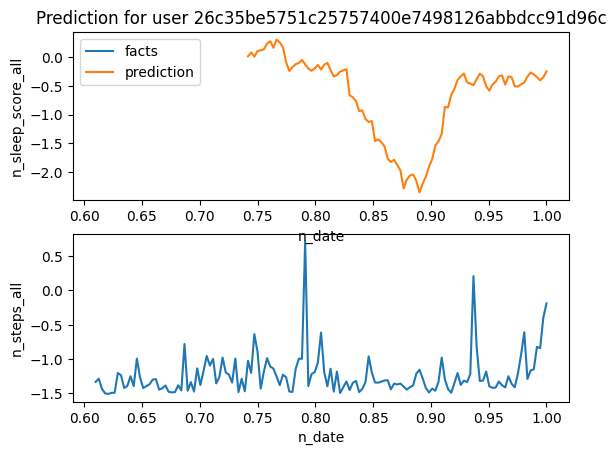

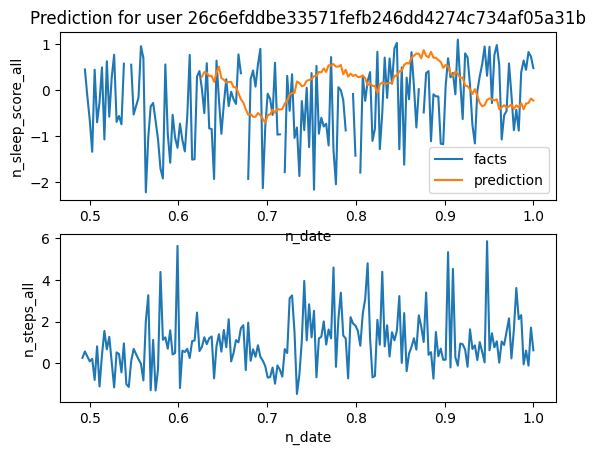

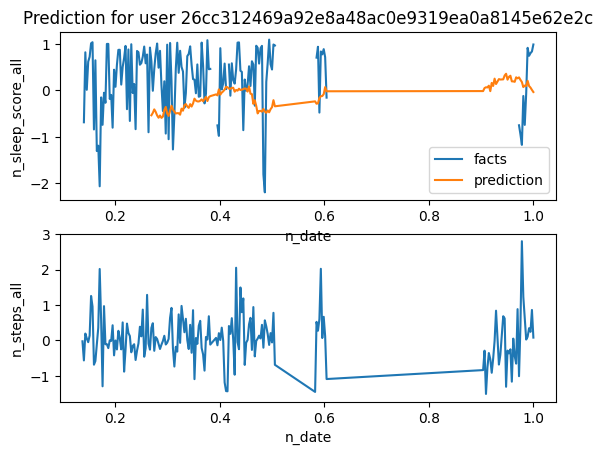

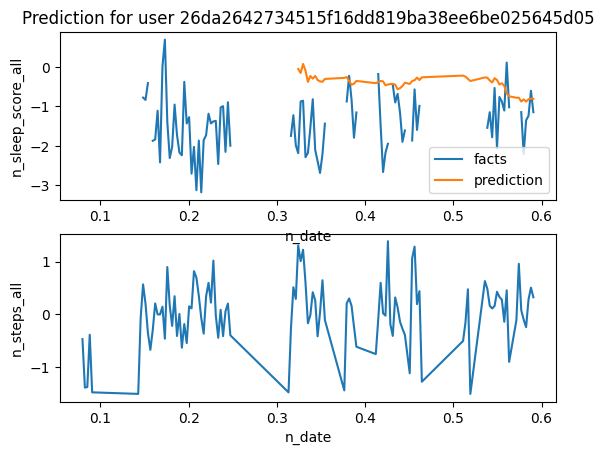

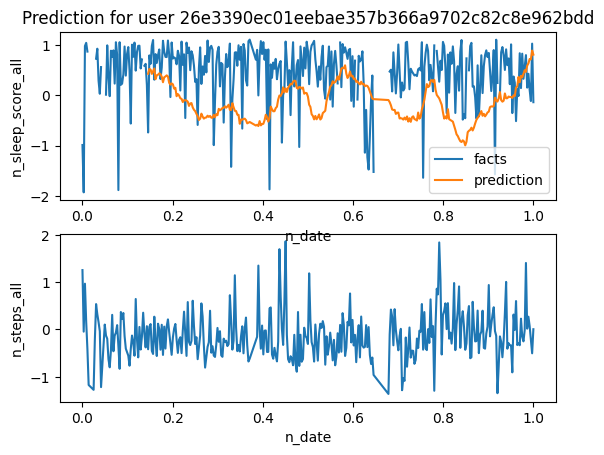

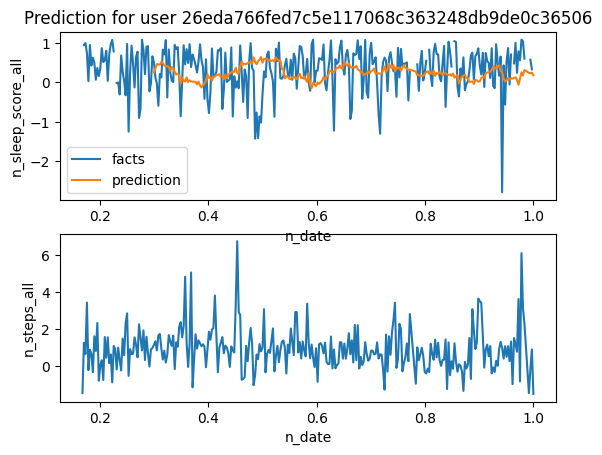

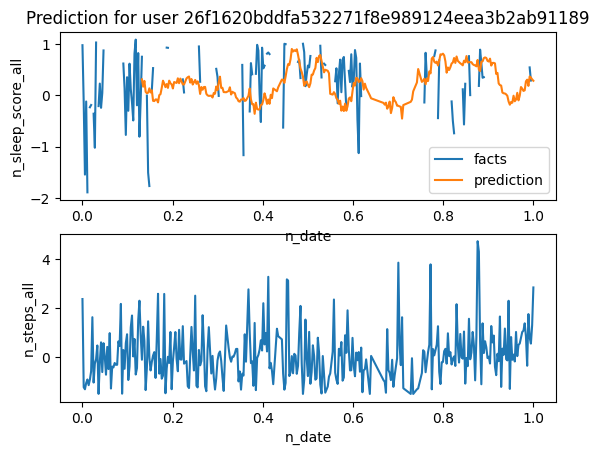

In [12]:
DateSleepStepPredictionVisualization(model, data = DateStepSleepData(chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE)).visualize()